[View in Colaboratory](https://colab.research.google.com/github/ShedH2/Colab/blob/master/IntroDopamine.ipynb)

In [14]:
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install dopaminekit
!pip install cmake
!pip install atari_py


    100% |████████████████████████████████| 71kB 4.7MB/s 
    100% |████████████████████████████████| 1.5MB 19.1MB/s 
    100% |████████████████████████████████| 1.0MB 19.4MB/s 
  Running setup.py install for gym ... - \ | done


In [0]:
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = '/tmp/colab_sh_run'
GAME  = 'Asterix'

In [0]:
# @title Create a new agent from scratch
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class BasicAgent(object): 
  def __init__(self, sess, num_actions, switch_prob=0.1):
    #tensorflow session
    self._sess = sess
    self._num_actions = num_actions
    self._switch_prob = switch_prob
    self._last_action = np.random.randint(num_actions)
    self.eval_mode = False
    
  def _choose_action(self):
    #define our policy
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
    
  def bundle_and_checkpoint(self, unused_checkpoint_dir, 
                            unused_iteration):
    pass
  
  def unbundle(self, unused_checkpoint_dir, 
               unused_checkpoint_version, unused_data):
    pass
  
  def begin_episode(self, unused_observation):
    return self._choose_action()  
  
  def end_episode(self, unused_reward):
    pass
  
  def step(self, reward, observation):
    return self._choose_action()
  
def create_basic_agent(sess, environment):
  return BasicAgent(sess, num_actions=environment.action_space.n, 
                    switch_prob=0.2)

basic_runner = run_experiment.Runner(LOG_PATH, create_basic_agent, 
                                     game_name=GAME, 
                                     num_iterations=200, 
                                     training_steps = 10, 
                                     evaluation_steps = 10,
                                     max_steps_per_episode=100)
  

In [29]:
# @title Train Basic Agent 
basic_runner.run_experiment()
print('done training')


INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 699.79
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 150.00
INFO:tensorflow:Average training steps per second: 708.59
INFO:tensorflow:Average undiscounted return per evaluation episode: 100.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 250.00
INFO:tensorflow:Average training steps per second: 686.51
INFO:tensorflow:Average undiscounted return per evaluation episode: 0.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 697.38
INFO:tensorflow:Average undiscounted return per evaluation episode: 

In [0]:
# @title Load baseline data
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data= colab_utils.load_baselines('/content')
  

In [33]:
# @title Load the training logs
basic_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data, 
                                                        how='outer')



Reading statistics from: /tmp/colab_sh_run/basic_agent/Asterix//logs/log_199


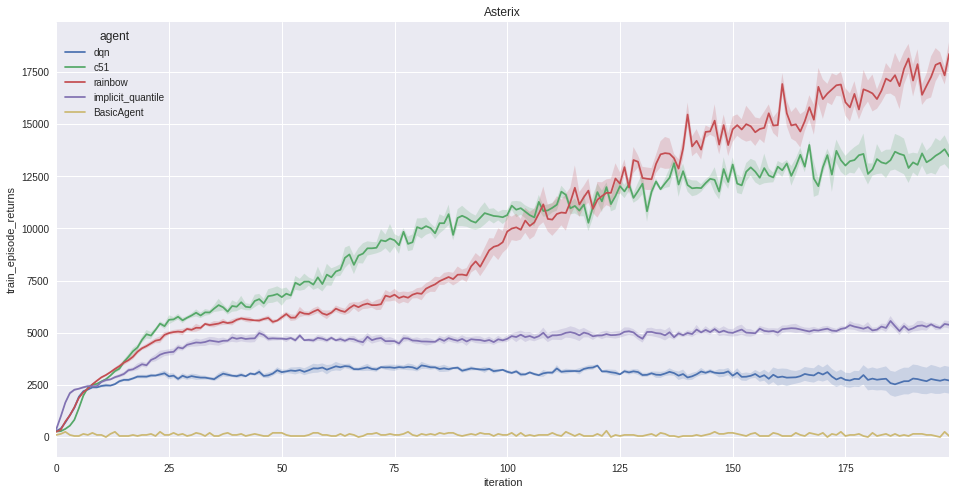

In [34]:
# @title  Plot the training results 

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16, 8))
sns.tsplot(data=experimental_data[GAME], 
          time = 'iteration', 
          unit='run_number',
          condition = 'agent', 
          value='train_episode_returns',
           ax=ax)
plt.title(GAME)
plt.show()
